Recap and Applications
===
---
1. Review
2. Applications
    * OLS Estimators $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$
    * Measures of Fit
    * Outliers

 ---
## 1. Review
* 1st week - 
    * cd / pwd
    * insheet using "file_name.csv", clear
    * sum / list / tab 
* 2nd week - 
    * corr / corr ,covariance
    * ci var, level( )
    * reg / eststo: reg / esttab
    * twoway scatter var1 var2 || lfit var1 var2
* 3nd week - 
    * reg var_list, robust
    * gen / egen / replace / drop 

In [44]:
cd "/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata/"
insheet using "beauty.csv", clear
drop v1


/Users/tino/Desktop/TA-Econometrics-II/notebooks_Stata

(6 vars, 1,260 obs)



In [2]:
sum
// wage: hourly wage
// exper: years of workforce experience
// female: = 1 if female
// looks: rate of beauty
// educ: years of schooling


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,260     6.30669    4.660639       1.02      77.72
       exper |      1,260    18.20635    11.96349          0         48
      female |      1,260    .3460317    .4758923          0          1
       looks |      1,260    3.185714    .6848774          1          5
        educ |      1,260    12.56349    2.624489          5         17


 ---
## 2. Applications
* OLS Estimators $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$
* Measures of Fit
* Outliers

### 2-1. OLS Estimators
* reg
* corr

In [4]:
reg wage exper


      Source |       SS           df       MS      Number of obs   =     1,260
-------------+----------------------------------   F(1, 1258)      =     73.29
       Model |  1505.53875         1  1505.53875   Prob > F        =    0.0000
    Residual |  25841.9004     1,258  20.5420512   R-squared       =    0.0551
-------------+----------------------------------   Adj R-squared   =    0.0543
       Total |  27347.4392     1,259  21.7215561   Root MSE        =    4.5323

------------------------------------------------------------------------------
        wage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       exper |   .0914061   .0106771     8.56   0.000     .0704594    .1123529
       _cons |   4.642518   .2325741    19.96   0.000     4.186242    5.098794
------------------------------------------------------------------------------


In [11]:
corr wage exper
sum(wage exper)
// We can verify the coef. of exper with correlation and s.d. of wage and exper.


(obs=1,260)

             |     wage    exper
-------------+------------------
        wage |   1.0000
       exper |   0.2346   1.0000



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |      1,260     6.30669    4.660639       1.02      77.72
       exper |      1,260    18.20635    11.96349          0         48


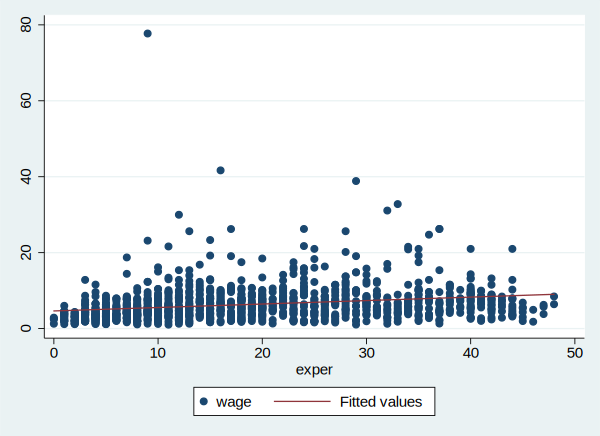

In [12]:
twoway scatter wage exper || lfit wage exper
// The coef. of constant.

![beta](img/beta.jpg)

 ---
### 2-2. Measures of Fit (and SER)
* gen / egen
* twoway scatter var1 var2 || lfit var1 var2

In [16]:
egen TSS = sum((wage - 6.30669)^2)
sum TSS




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         TSS |      1,260    27347.44           0   27347.44   27347.44


In [24]:
gen y_hat = 4.642518 + 0.0914061 * exper
egen ESS = sum((y_hat - 6.30669)^2)
sum ESS





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         ESS |      1,260    1505.537           0   1505.537   1505.537


In [25]:
gen u_hat = wage - y_hat
egen SSR = sum(u_hat^2)
sum SSR





    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         SSR |      1,260     25841.9           0    25841.9    25841.9


**Therefore, we have computed the SSR, ESS, and SSR. And you can verify the following two equations on textbook.**
![ch4_1](img/ch4_1.png)

In [26]:
gen SER = sqrt(SSR/1258)
sum SER




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         SER |      1,260    4.532334           0   4.532334   4.532334


 ---
### 2-3. Outliers

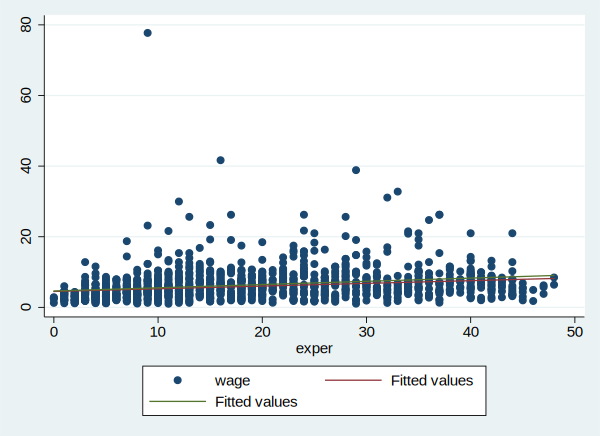

In [45]:
twoway scatter wage exper if wage || lfit wage exper if wage < 20 || lfit wage exper

![outlier](img/outlier.png)